In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Credit Card Customer Data.csv')
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
dataset.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
dataset.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
dataset.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


### Membuat boxplot dari setiap kolom (variabel) dalam dataset untuk mengidentifikasi adanya outlier. Boxplot adalah salah satu metode visualisasi yang membantu dalam memahami sebaran data dan mengidentifikasi nilai-nilai yang berada jauh dari nilai-nilai lainnya (outlier).

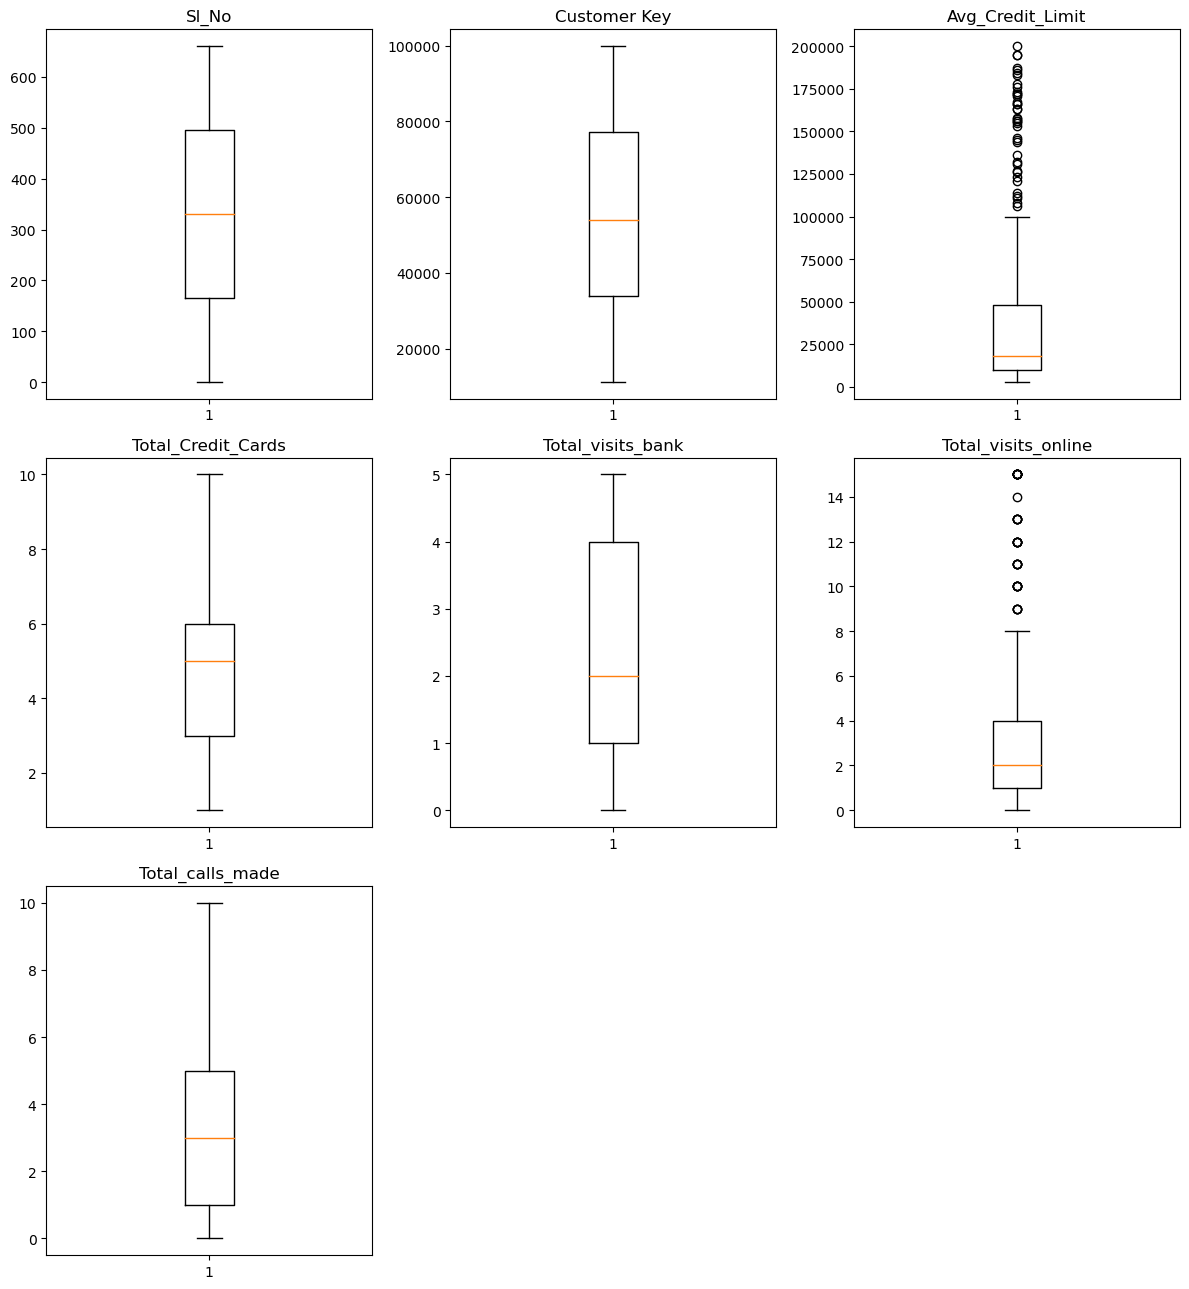

In [7]:
columns = dataset.columns
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(dataset[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

### Visualiasi dan Analisis

In [8]:
dataset['Total_interaction']= dataset['Total_calls_made'] + dataset['Total_visits_online'] + dataset['Total_visits_bank']

In [9]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,19
2,3,17341,50000,7,1,3,4,8
3,4,40496,30000,5,1,1,4,6
4,5,47437,100000,6,0,12,3,15


#### Code tersebut digunakan untuk membuat kolom baru yang disebut 'Total_interaction' dalam DataFrame (df). Kolom baru ini merupakan hasil penjumlahan dari tiga kolom lainnya: 'Total_calls_made', 'Total_visits_online', dan 'Total_visits_bank'.Dengan membuat kolom ini, Anda menggabungkan informasi interaksi pelanggan dari tiga sumber yang berbeda (panggilan telepon, kunjungan online, dan kunjungan ke bank) ke dalam satu nilai yang dapat memberikan gambaran keseluruhan tentang tingkat interaksi pelanggan

In [10]:
mean_cl = round(dataset['Avg_Credit_Limit'].mean(), 2)

higher_mean_cl = dataset[dataset['Avg_Credit_Limit'] > mean_cl]
below_mean_cl = dataset[dataset['Avg_Credit_Limit'] < mean_cl]
print('Jumlah catatan yang memiliki skor kredit di atas rata-rata:', higher_mean_cl.shape[0])
print('Jumlah catatan yang memiliki skor kredit di bawah rata-rata :', below_mean_cl.shape[0])

Jumlah catatan yang memiliki skor kredit di atas rata-rata: 231
Jumlah catatan yang memiliki skor kredit di bawah rata-rata : 429


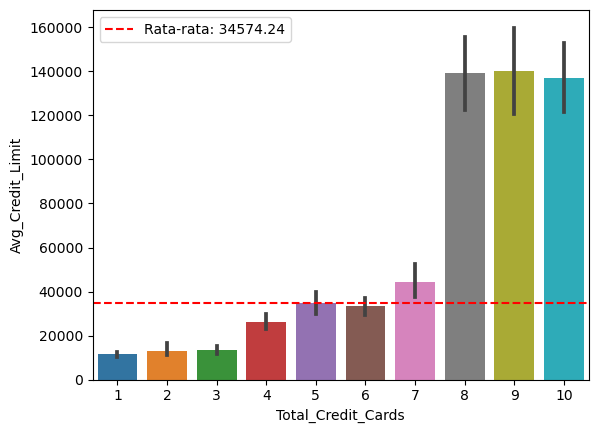

,Total_Credit_Cards,Avg_Credit_Limit
0,1,11457.63
1,2,13187.50
2,3,13301.89
3,4,26311.26
4,5,34689.19
5,6,33205.13
6,7,44495.05
7,8,139454.55
8,9,140090.91
9,10,136842.11


In [11]:
sns.barplot(data = dataset,x = dataset["Total_Credit_Cards"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()
plt.show()
d = round(dataset.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

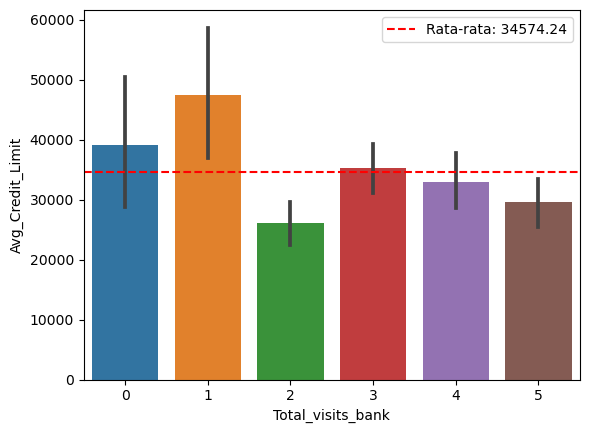

,Total_visits_bank,Avg_Credit_Limit
0,0,39150.00
1,1,47544.64
2,2,26050.63
3,3,35300.00
4,4,33000.00
5,5,29561.22


In [12]:
sns.barplot(data = dataset,x = dataset["Total_visits_bank"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(dataset.groupby('Total_visits_bank')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

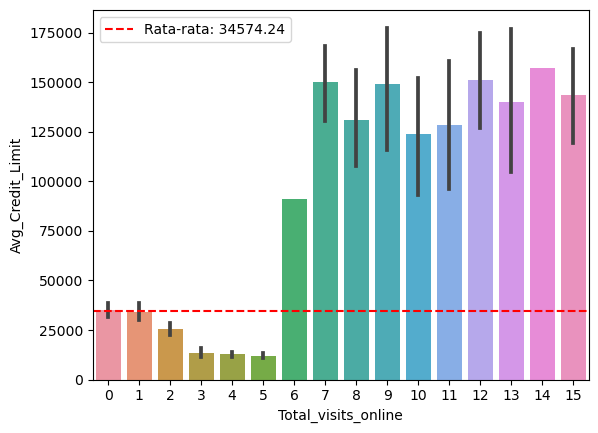

,Total_visits_online,Avg_Credit_Limit
0,0,35131.94
1,1,34091.74
2,2,25523.81
3,3,13272.73
4,4,12739.13
5,5,12129.63
6,6,91000.00
7,7,149857.14
8,8,130666.67
9,9,149250.00


In [13]:
sns.barplot(data = dataset,x = dataset["Total_visits_online"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()
d = round(dataset.groupby('Total_visits_online')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

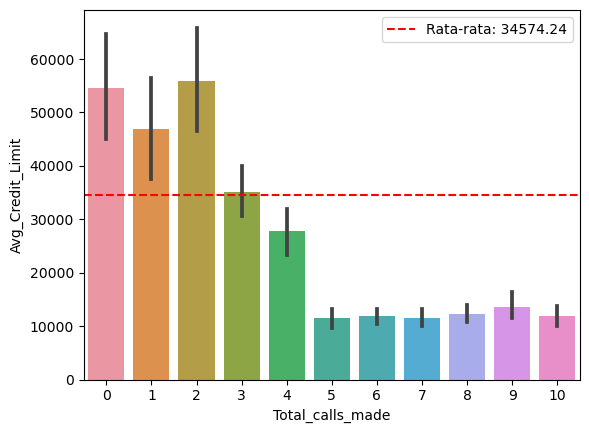

,Total_calls_made,Avg_Credit_Limit
0,0,54536.08
1,1,46877.78
2,2,55868.13
3,3,35120.48
4,4,27787.04
5,5,11482.76
6,6,11897.44
7,7,11571.43
8,8,12300.00
9,9,13500.00


In [14]:
sns.barplot(data = dataset,x = dataset["Total_calls_made"], y = dataset["Avg_Credit_Limit"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Rata-rata: {mean_cl:.2f}')
plt.legend()

plt.show()

d = round(dataset.groupby('Total_calls_made')['Avg_Credit_Limit'].mean(),2)
d.reset_index()

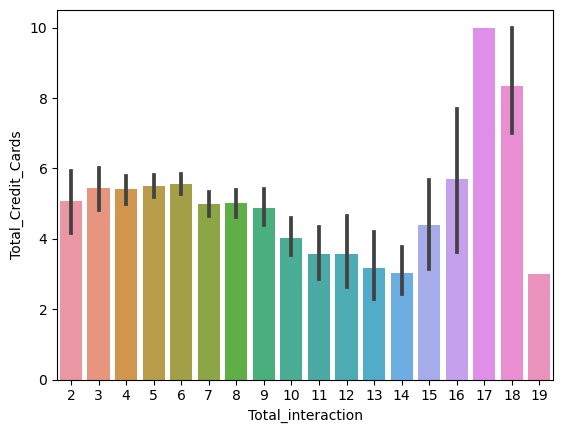

In [15]:
sns.barplot(data = dataset,x = dataset["Total_interaction"], y = dataset["Total_Credit_Cards"])

plt.show()

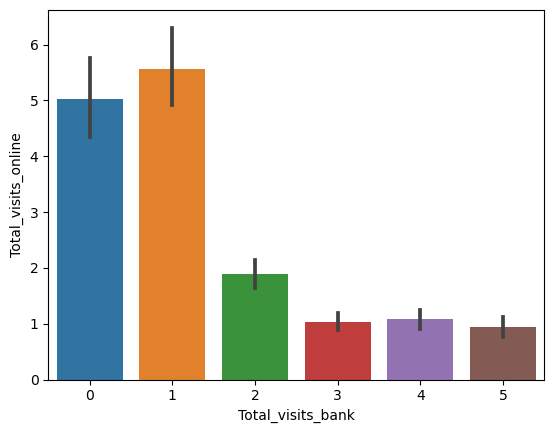

In [16]:
sns.barplot(x = dataset["Total_visits_bank"], y= dataset["Total_visits_online"])
plt.show()

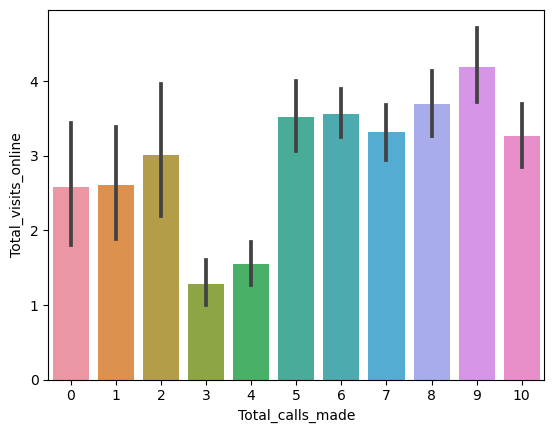

In [17]:
sns.barplot(x = dataset["Total_calls_made"], y= dataset["Total_visits_online"])
plt.show()

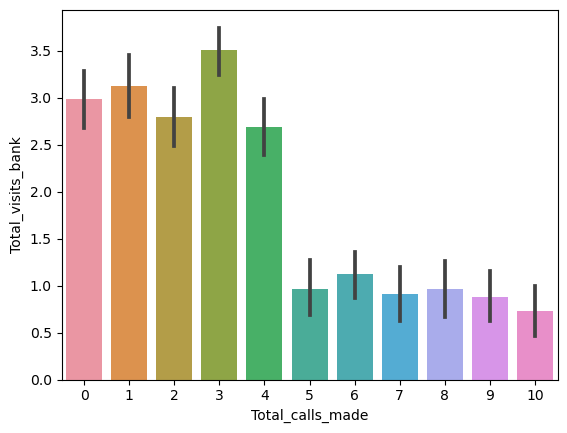

In [18]:
sns.barplot(x = dataset["Total_calls_made"], y= dataset["Total_visits_bank"])
plt.show()

<Axes: >

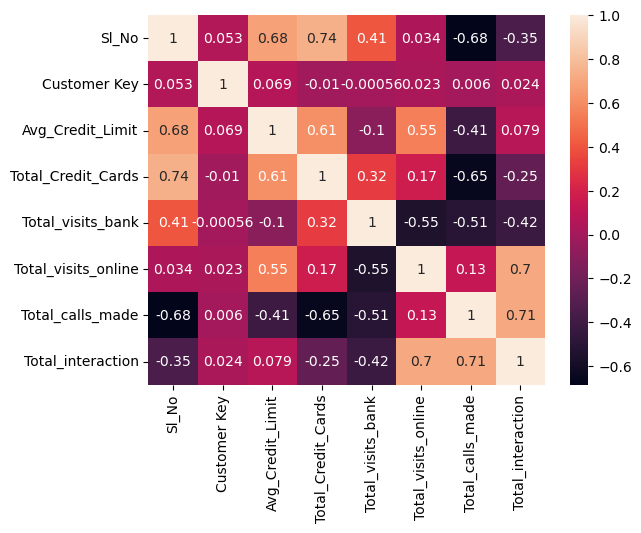

In [19]:
sns.heatmap(dataset.corr(), annot=True)

### Preprosesing Data

In [20]:
X = dataset.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()

In [21]:
X

,index,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction
0,0,100000,2,1,1,0,2
1,1,50000,3,0,10,9,19
2,2,50000,7,1,3,4,8
3,3,30000,5,1,1,4,6
4,4,100000,6,0,12,3,15
...,...,...,...,...,...,...,...
655,655,99000,10,1,10,0,11
656,656,84000,10,1,13,2,16
657,657,145000,8,1,9,1,11
658,658,172000,10,1,15,0,16


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Modelling

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

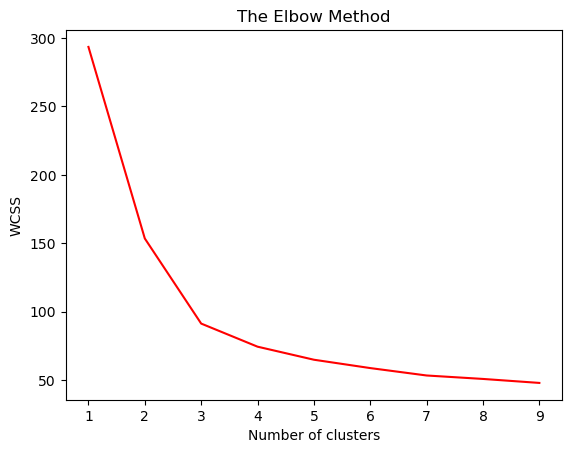

In [23]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


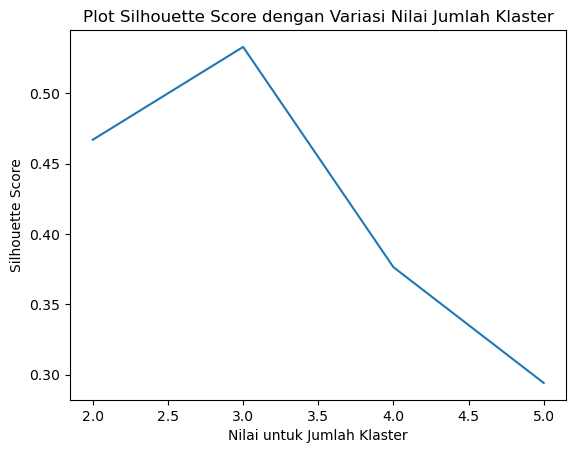

In [24]:
from sklearn.metrics import silhouette_score

sil_score = []
i_range = []
for i in range (2,6):
    kmeans = KMeans(n_clusters=i, random_state = 42).fit(X)
    t = silhouette_score(X, kmeans.labels_)
    sil_score.append(t)
    i_range.append(i)
p = sns.lineplot(x = i_range, y = sil_score)
p.set_xlabel("Nilai untuk Jumlah Klaster")
p.set_ylabel("Silhouette Score")
p.set_title("Plot Silhouette Score dengan Variasi Nilai Jumlah Klaster")
plt.show()


In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# fitting input data
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
dataset['Cluster'] = labels
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_interaction,Cluster
0,1,87073,100000,2,1,1,0,2,1
1,2,38414,50000,3,0,10,9,19,1
2,3,17341,50000,7,1,3,4,8,1
3,4,40496,30000,5,1,1,4,6,1
4,5,47437,100000,6,0,12,3,15,1
...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,11,2
656,657,60732,84000,10,1,13,2,16,2
657,658,53834,145000,8,1,9,1,11,2
658,659,80655,172000,10,1,15,0,16,2


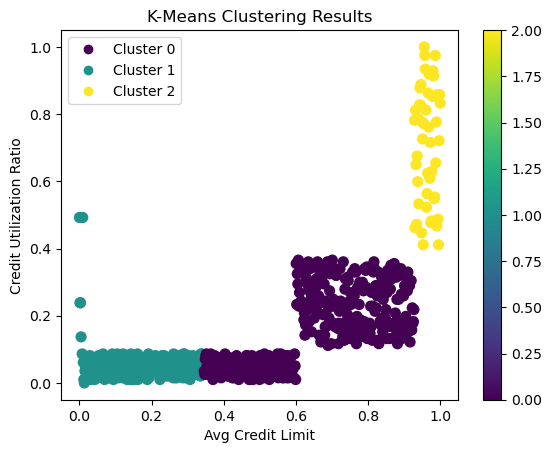

In [27]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.title('K-Means Clustering Results')
plt.colorbar()